In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

from mlscorecheck.auc import p_norm_fit

In [2]:
input_label = 'single'

input_file = f'raw-{input_label}-50k-syn.csv'
output_file = f'fit-{input_label}-50k-syn.csv'

In [3]:
data = pd.read_csv(input_file)

In [16]:
data['fprs'] = data['fprs'].apply(lambda x: np.array(eval(x)))
data['tprs'] = data['tprs'].apply(lambda x: np.array(eval(x)))
data['fracs'] = 1.0 - (data['fprs'] * data['n'] + data['tprs'] * data['p']) / (data['n'] + data['p'])

In [5]:
data['exp_fpr'] = data.apply(lambda row: p_norm_fit(row['fracs'], row['fprs'], mode='explicit'), axis=1)
data['exp_tpr'] = data.apply(lambda row: p_norm_fit(row['fracs'], row['tprs'], mode='explicit'), axis=1)

In [6]:
data['r2_fpr'] = data.apply(lambda row: r2_score(row['fprs'], (1 - row['fracs']**row['exp_fpr'])**(1/row['exp_fpr'])), axis=1)
data['r2_tpr'] = data.apply(lambda row: r2_score(row['tprs'], (1 - row['fracs']**row['exp_tpr'])**(1/row['exp_tpr'])), axis=1)

In [ ]:
def fit_roc(row):
    fprs = row['fprs']
    tprs = row['tprs']
    p_both = p_norm_fit(1 - fprs, tprs, bracket=(-5, 2))
    
    tprs_pred = (1.0 - (1 - fprs)**p_both)**(1/p_both)
    fprs_pred = 1.0 - (1.0 - tprs**p_both)**(1/p_both)

    return max(r2_score(tprs, tprs_pred), r2_score(fprs, fprs_pred))

In [8]:
data['r2_roc'] = data.apply(fit_roc, axis=1)

In [ ]:
#tmp = data[data['n_nodes'] > 100]
tmp = data

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e-05,
        0.0000e+00, 8.0000e-05, 4.6000e-04, 1.5200e-03, 5.8800e-03,
        1.7440e-02, 4.3860e-02, 1.0134e-01, 8.2940e-01]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <BarContainer object of 19 artists>)

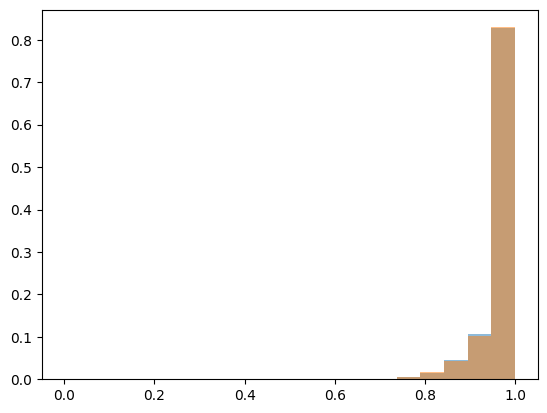

In [20]:
plt.hist(tmp['r2_fpr'], alpha=0.5, bins=np.linspace(0, 1, 20), weights=np.repeat(1/len(tmp), len(tmp)))
plt.hist(tmp['r2_tpr'], alpha=0.5, bins=np.linspace(0, 1, 20), weights=np.repeat(1/len(tmp), len(tmp)))

(array([  222.,   209.,   199.,   272.,   345.,   476.,   361.,   368.,
          428.,   549.,   705.,   930.,  1170.,  1433.,  1646.,  1988.,
         2704.,  4611., 28673.]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 <BarContainer object of 19 artists>)

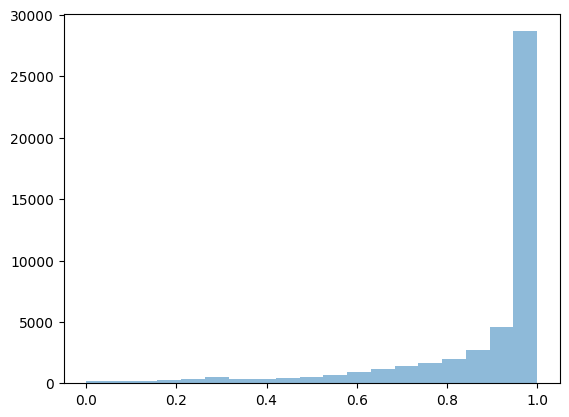

In [11]:
plt.hist(data['r2_roc'], alpha=0.5, bins=np.linspace(0, 1, 20))

In [12]:
data['fprs'] = data['fprs'].apply(lambda x: str(x.tolist()))
data['tprs'] = data['tprs'].apply(lambda x: str(x.tolist()))
data['fracs'] = data['fracs'].apply(lambda x: str(x.tolist()))

In [13]:
data.to_csv(output_file, index=False)